In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import aif360
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier


original_df = pd.read_csv(r"Data\loan_data.csv")
pd.options.mode.chained_assignment = None

In [7]:
# Convert all column names to lowercase
original_df.columns = original_df.columns.str.lower()

# Make ID string type
original_df['id'] = original_df['id'].astype(str)

# Drop year since all entries are 2019
original_df.drop(columns=['year'], inplace=True)

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  object 
 1   loan_limit                 145326 non-null  object 
 2   gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   credit_worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  interest_rate_spread       112031 non-null  float64
 12  upfront_charges            109028 non-null  float64
 13  term                       14

In [8]:
df = original_df.sample(frac=.1)
print("New DataFrame Length:")
print(df.shape)

New DataFrame Length:
(14867, 33)


In [9]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

id                              0
loan_limit                    318
gender                          0
approv_in_adv                  87
loan_type                       0
loan_purpose                   12
credit_worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             3607
interest_rate_spread         3632
upfront_charges              3933
term                            7
neg_ammortization              12
interest_only                   0
lump_sum_payment                0
property_value               1502
construction_type               0
occupancy_type                  0
secured_by                      0
total_units                     0
income                        931
credit_type                     0
credit_score                    0
co-applicant_credit_type        0
age                            25
submission_of_application      25
ltv                          1502
region        

In [10]:
# Getting dataframes by datatype
data_types = pd.DataFrame(df.dtypes).reset_index()

categorical_vars = []
numerical_vars = []
for i, l in zip(data_types['index'], data_types[0]):
    if l == 'object':
        categorical_vars.append(i)
    else:
        numerical_vars.append(i)

In [11]:
# Numeric Dataframe
df_num = df[numerical_vars]

# knn
knn = KNNImputer(n_neighbors = 2)
knn.fit(df_num)
X = knn.fit_transform(df_num)

# Check for any nas
df_num = pd.DataFrame(X, columns=numerical_vars)

In [12]:
# Categorical Dataframe
df_cat = df[categorical_vars]

for i in categorical_vars:
    mode = df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

# Combining dataframes
df_new = pd.concat([df_num, df_cat], axis=1, join='inner')
print(df_new.isna().sum())

loan_amount                  0
rate_of_interest             0
interest_rate_spread         0
upfront_charges              0
term                         0
property_value               0
income                       0
credit_score                 0
ltv                          0
status                       0
dtir1                        0
id                           0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security

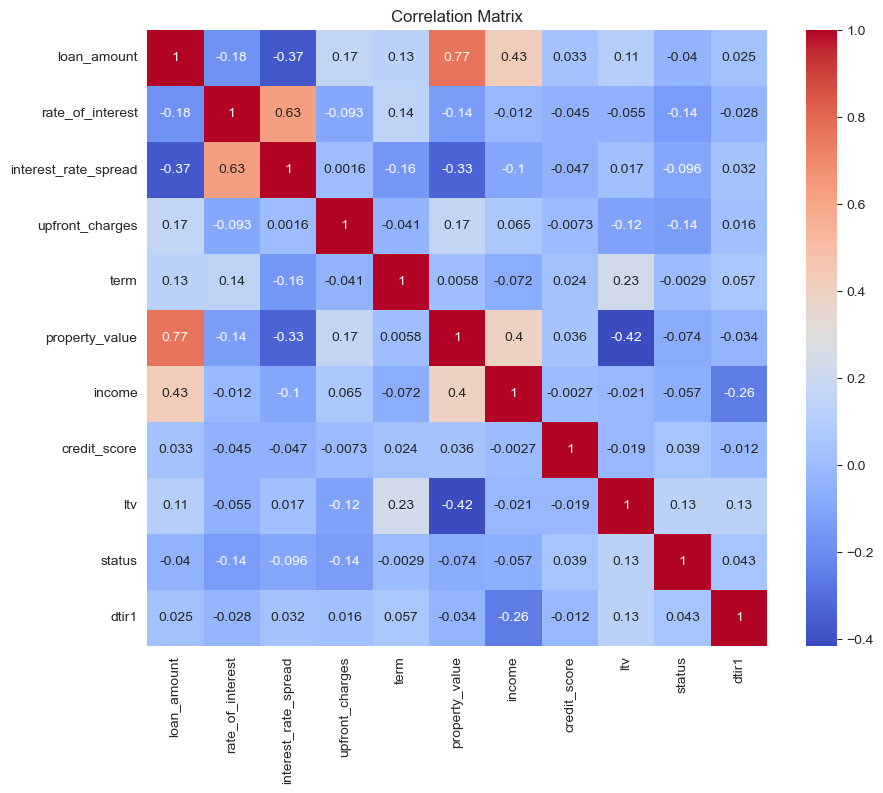

In [17]:
# Generate a correlation matrix
correlation_matrix = df_new.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

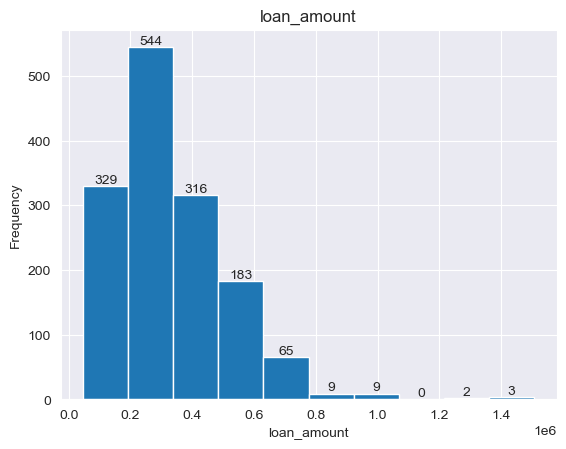

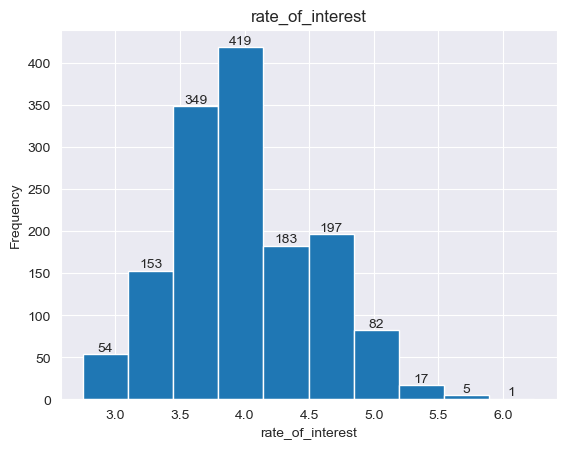

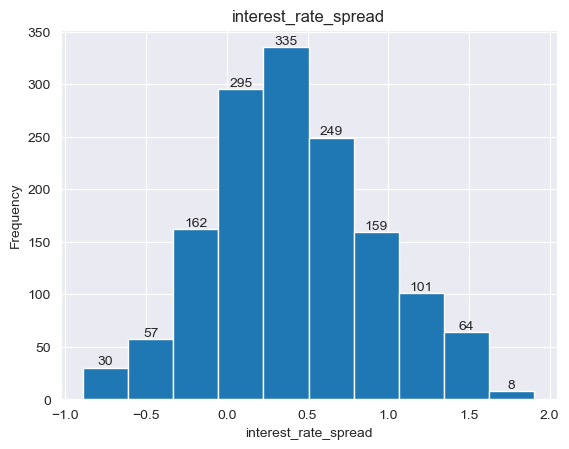

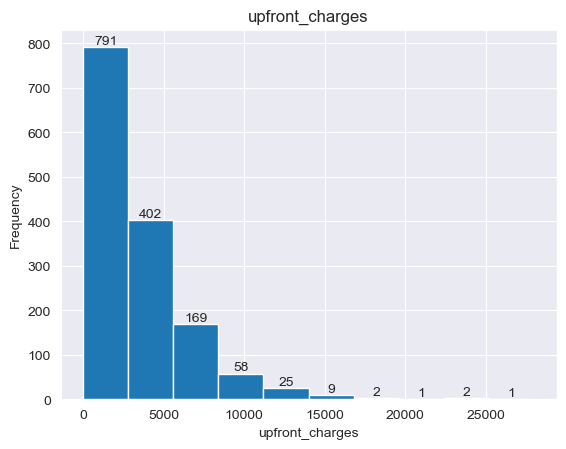

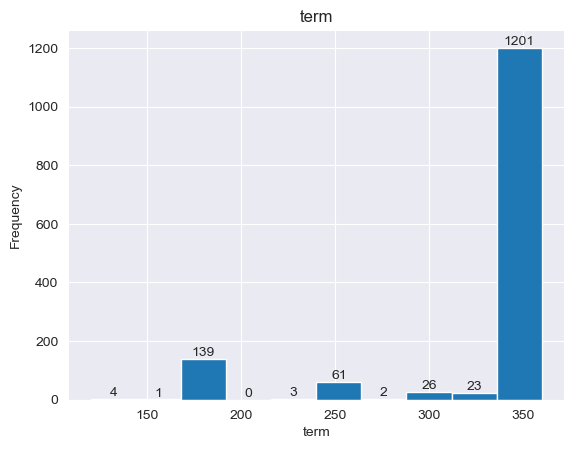

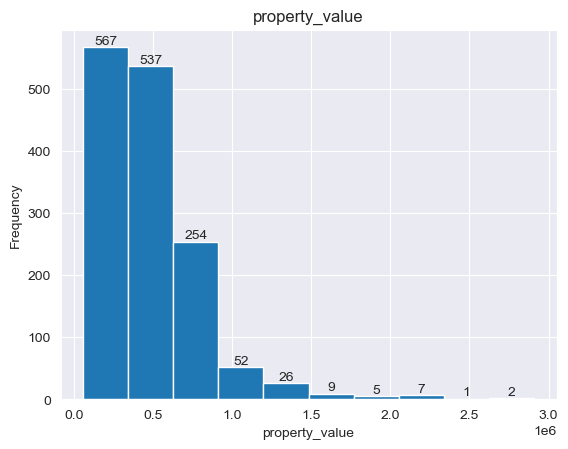

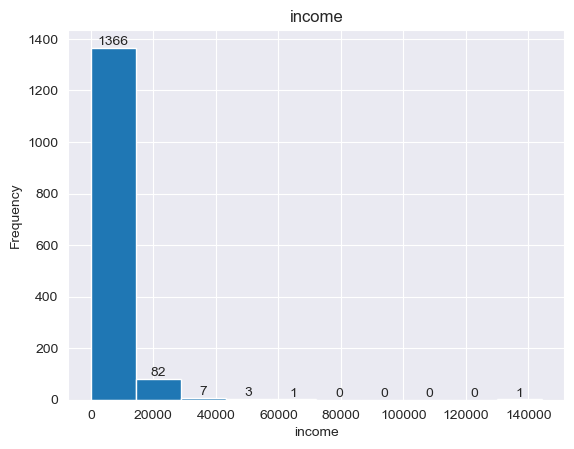

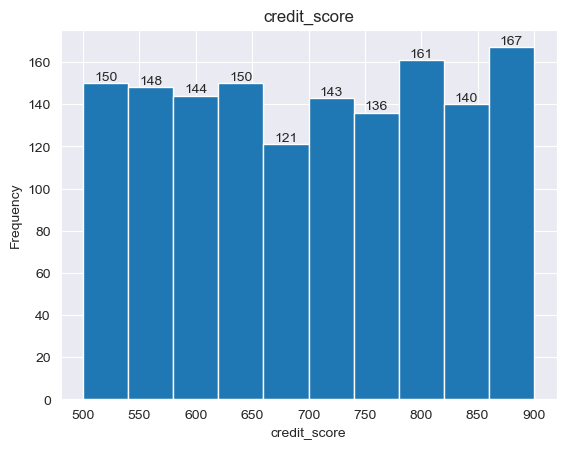

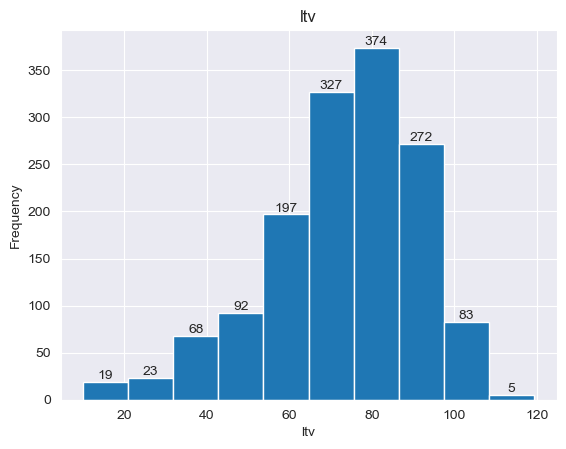

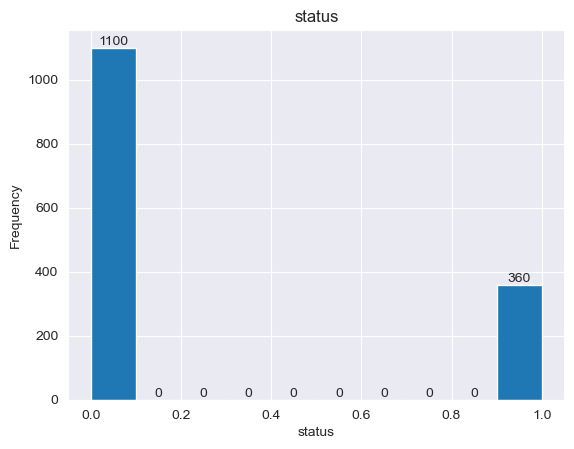

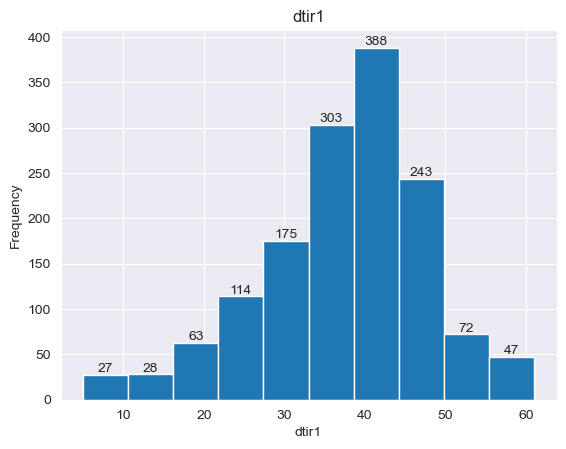

In [14]:
# Create histograms for each numerical column
for column in numerical_vars:
    plt.figure()

    # Create histogram and get the bin edges and frequency counts
    n, bins, patches = plt.hist(df_new[column])

    # Iterate through each bar in the histogram
    for i in range(10):
        # Calculate the x-coordinate of the data label (center of the bar)
        x = (bins[i] + bins[i+1]) / 2

        # Get the frequency count for the current bin
        y = n[i]

        # Format the label with the count
        label = f"{int(y)}"

        # Add the label above the bar
        plt.text(x, y, label, ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(column)
    plt.show()

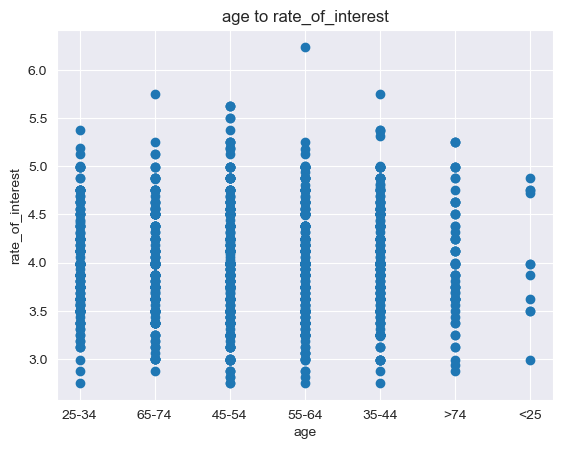

In [15]:
# Create a scatter plot of two numerical columns
plt.scatter(df_new['age'], df_new['rate_of_interest'])
plt.xlabel('age')
plt.ylabel('rate_of_interest')
plt.title('age to rate_of_interest')
plt.show()

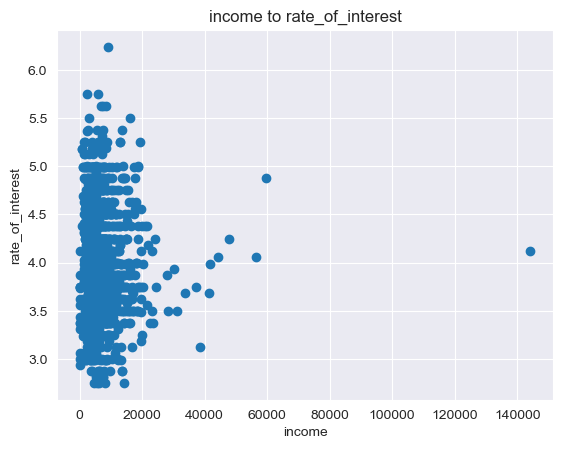

In [16]:
# Create a scatter plot of two numerical columns
plt.scatter(df_new['income'], df_new['rate_of_interest'])
plt.xlabel('income')
plt.ylabel('rate_of_interest')
plt.title('income to rate_of_interest')
plt.show()